# The Model

In this part I'll develop the main Deep Learning model for the project. The Model is the main part of this project. For more information about the project, please check the github repo of the project.

## Libraries
In this part of the project, I've used several Machine Learning and Data Preprocessing libraries. 

The main agenda of this section is to import all libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm  

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
print('Pandas version - ' + str(pd.__version__))
print('Numpy version - ' + str(np.__version__))
print('Matplotlib version - ' + str(matplotlib.__version__))
print('Sklearn version - ' + str(sklearn.__version__))

Pandas version - 0.23.4
Numpy version - 1.15.4
Matplotlib version - 3.0.2
Sklearn version - 0.20.1


## Analysing the dataset
Now in this section, I'll analyse the dataset to gain for useful information about the dataset

In [3]:
data = pd.read_csv('dataset/faces.csv')

data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024,class
0,28,25,28,27,59,26,29,29,30,30,...,173,200,39,114,112,100,79,67,51,boy
1,18,24,20,22,19,19,26,40,38,65,...,82,77,84,91,90,42,23,23,26,girl
2,32,31,26,24,26,39,55,66,79,73,...,180,190,190,201,203,185,58,28,80,girl
3,128,142,137,135,117,122,92,115,106,84,...,46,42,32,26,70,75,66,83,76,boy
4,193,104,74,101,103,107,110,135,136,139,...,168,205,185,218,196,179,188,225,207,boy


In [4]:
data.tail()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024,class
1967,22,18,37,44,39,36,35,31,33,38,...,118,126,131,147,167,174,178,118,173,boy
1968,108,110,104,104,56,53,18,17,133,189,...,80,74,62,58,49,40,43,36,41,girl
1969,39,48,40,53,42,39,48,32,49,83,...,123,108,80,89,101,99,102,108,103,girl
1970,165,182,177,174,176,162,155,164,139,144,...,37,36,46,37,34,37,38,34,34,girl
1971,64,32,24,22,28,51,79,95,93,98,...,214,215,207,206,209,203,201,210,207,boy


In [5]:
data.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,...,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,92.533469,87.426978,82.955882,79.877282,79.912272,81.122211,85.029919,90.618661,96.814402,103.879310,...,109.412779,108.315416,106.951826,105.725152,104.752535,104.027383,104.260142,103.752535,104.299696,105.621704
std,72.217275,69.641797,67.281786,65.019141,62.536742,61.172509,61.284936,61.398290,62.047870,62.890002,...,62.125240,62.736513,64.204560,64.824295,66.905414,68.289690,69.914391,69.858897,71.880128,72.793460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,31.000000,30.000000,29.000000,31.750000,32.000000,35.000000,39.000000,44.000000,50.000000,...,56.000000,54.000000,50.000000,51.000000,46.000000,44.000000,42.000000,43.000000,40.000000,41.000000
50%,74.500000,66.000000,61.000000,59.000000,61.500000,65.500000,73.000000,80.000000,89.000000,98.000000,...,107.000000,103.500000,102.000000,97.000000,95.000000,93.000000,93.000000,91.000000,92.000000,92.000000
75%,146.000000,135.000000,128.000000,119.000000,116.000000,116.000000,124.000000,130.000000,142.000000,152.000000,...,160.250000,160.000000,160.000000,160.000000,160.000000,160.000000,164.250000,163.000000,164.000000,167.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [6]:
data.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel1016', 'pixel1017', 'pixel1018', 'pixel1019', 'pixel1020',
       'pixel1021', 'pixel1022', 'pixel1023', 'pixel1024', 'class'],
      dtype='object', length=1025)

In [7]:
data.shape

(1972, 1025)

## Data Preprocessing
Data Preprocessing is one of the mose important step in Machine Learning and Deep Learning. In this step I'll preprocess the dataset.

In [11]:
# Separating the dataset into two sections, input(X) and output(y)

X_data = data.drop(['class'], axis=1)
y_data = data['class']

print(X_data.shape)
print(y_data.shape)

(1972, 1024)
(1972,)


In [12]:
# Encoding the output using LabelEncoder

encoding = LabelEncoder()

y_data = encoding.fit_transform(y_data).reshape(-1,1)

In [13]:
# Normalizing the dataset using MinMaxScaler

scaler = MinMaxScaler()
X_data = scaler.fit_transform(X_data)

/home/subhojit/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
# Spliting the dataset into training the testing set using sklearn's train_and_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.4, random_state=20)

## Data Visualization
Now lets plot the the images to see the dataset

/home/subhojit/.local/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


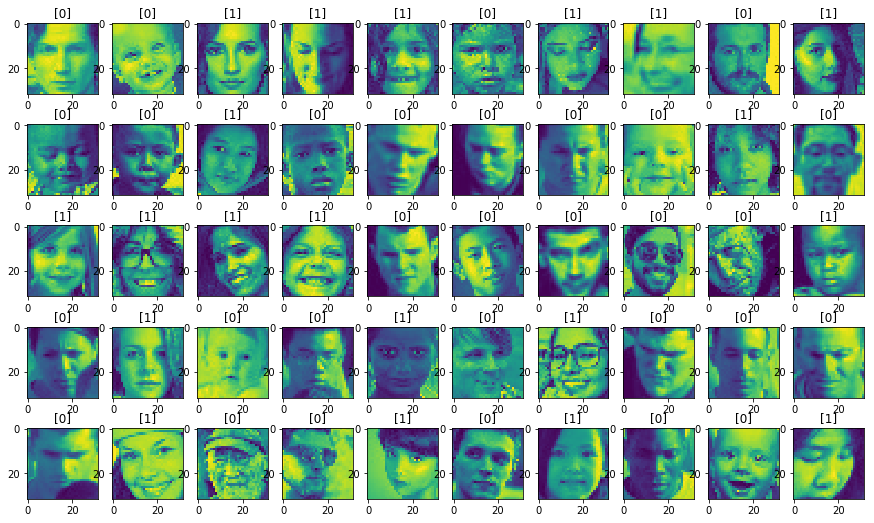

In [15]:
plt.figure(figsize=(15,9))
for i in range(50):
    plt.subplot(5,10,1+i)
    plt.title(y_train[i])
    plt.imshow(X_train[i].reshape(32,32))